Epoch 1/10
422/422 - 4s - 9ms/step - accuracy: 0.9299 - loss: 0.2541 - val_accuracy: 0.9705 - val_loss: 0.1011
Epoch 2/10
422/422 - 2s - 5ms/step - accuracy: 0.9752 - loss: 0.0831 - val_accuracy: 0.9738 - val_loss: 0.0823
Epoch 3/10
422/422 - 2s - 5ms/step - accuracy: 0.9839 - loss: 0.0532 - val_accuracy: 0.9783 - val_loss: 0.0747
Epoch 4/10
422/422 - 2s - 5ms/step - accuracy: 0.9886 - loss: 0.0370 - val_accuracy: 0.9807 - val_loss: 0.0719
Epoch 5/10
422/422 - 2s - 5ms/step - accuracy: 0.9904 - loss: 0.0294 - val_accuracy: 0.9807 - val_loss: 0.0717
Epoch 6/10
422/422 - 2s - 5ms/step - accuracy: 0.9922 - loss: 0.0239 - val_accuracy: 0.9818 - val_loss: 0.0645
Epoch 7/10
422/422 - 2s - 4ms/step - accuracy: 0.9942 - loss: 0.0188 - val_accuracy: 0.9795 - val_loss: 0.0766
Epoch 8/10
422/422 - 2s - 4ms/step - accuracy: 0.9948 - loss: 0.0164 - val_accuracy: 0.9793 - val_loss: 0.0857
Epoch 9/10
422/422 - 2s - 5ms/step - accuracy: 0.9952 - loss: 0.0149 - val_accuracy: 0.9797 - val_loss: 0.0736
E

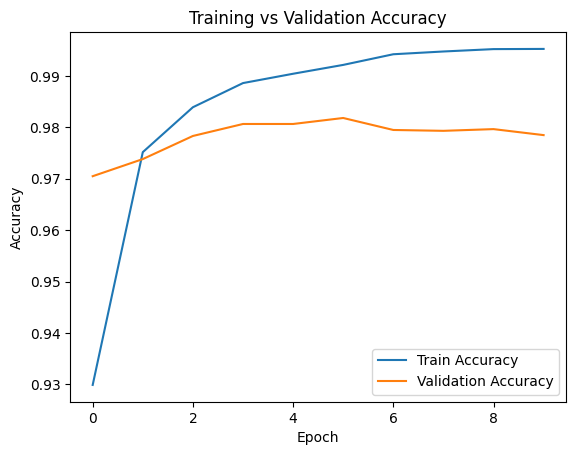

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

# Flatten the images
x_train = x_train.reshape(-1, 28 * 28)
x_test  = x_test.reshape(-1, 28 * 28)

# Convert labels to one-hot
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# Build model with Batch Normalization
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(64),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    validation_split=0.1,
                    epochs=10,
                    batch_size=128,
                    verbose=2)

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()
